In [23]:
import pandas as pd
from matplotlib import pyplot as plt

from notebooks.analytics.utils import init_analysis, savefig
import seaborn as sns
from notebooks.analytics.utils import set_save_folder

In [24]:


fed_avg = init_analysis("fed_avg_13")
fed_avg["label"] = "FedAvg"
declust_3 = init_analysis(f"daeclust_16-clusters-selection")
declust_3["label"] = "FedSwarm - tol. 3"
declust_2 = init_analysis(f"daeclust_17_00-clusters-selection")
declust_2["label"] = "FedSwarm - tol. 2"
declust_mix = init_analysis(f"daeclust_20_01-clusters-selection")
declust_mix["label"] = "FedSwarm - Mix. tol."

set_save_folder("tolerance_analysis")
all_data = pd.concat([fed_avg, declust_3, declust_2, declust_mix])

In [25]:
all_data_mean = all_data.groupby(["round_id", "trainer_id", "label"])["test_acc"].max().groupby(["round_id", "label"]).mean().reset_index()

In [26]:
all_data_mean

,round_id,label,test_acc
0,0.0,FedAvg,NaN
1,1.0,FedAvg,0.205368
2,1.0,FedSwarm - Mix. tol.,0.722274
3,1.0,FedSwarm - tol. 2,0.690421
4,1.0,FedSwarm - tol. 3,0.658642
...,...,...,...
401,101.0,FedAvg,0.965811
402,101.0,FedSwarm - Mix. tol.,0.977747
403,101.0,FedSwarm - tol. 2,0.973495
404,101.0,FedSwarm - tol. 3,0.961137


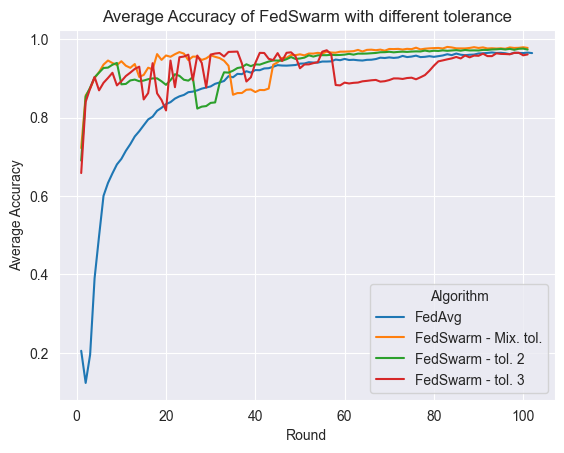

In [27]:
ax = sns.lineplot(all_data_mean, x="round_id", y="test_acc", hue="label")
plt.ylabel("Average Accuracy")
plt.xlabel("Round")
plt.title("Average Accuracy of FedSwarm with different tolerance")
plt.legend(title="Algorithm")
savefig(plt, "tolerance_analysis_avg_acc")

plt.show()

In [28]:
all_data.loc[all_data.round_id == 10, "test_acc"]

685        NaN
686        NaN
687        NaN
688        NaN
689        NaN
         ...  
7987    0.9244
7988    0.8976
7989    0.5920
7990    0.5592
7991    0.8736
Name: test_acc, Length: 1596, dtype: float64

<AxesSubplot: xlabel='test_acc', ylabel='Count'>

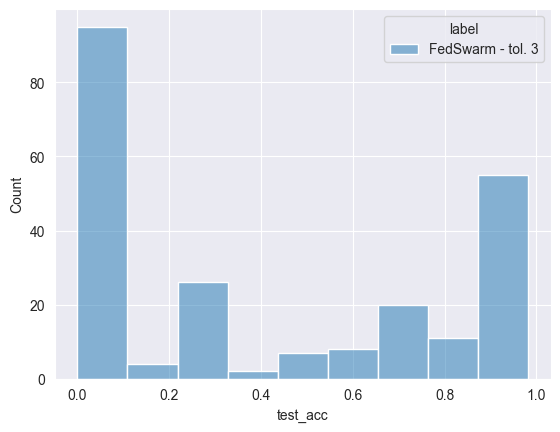

In [29]:
sns.histplot(declust_3.loc[declust_3.round_id == 4, ["test_acc", "label"]], x="test_acc", hue="label")

<AxesSubplot: xlabel='test_acc', ylabel='Count'>

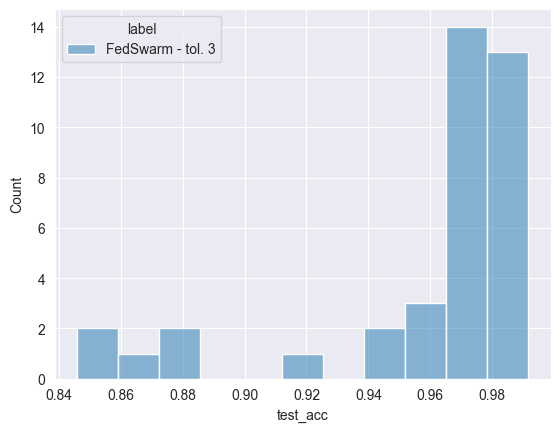

In [30]:
sns.histplot(declust_3.loc[declust_3.round_id == 100, ["test_acc", "label"]], x="test_acc", hue="label")

<AxesSubplot: xlabel='test_acc', ylabel='Count'>

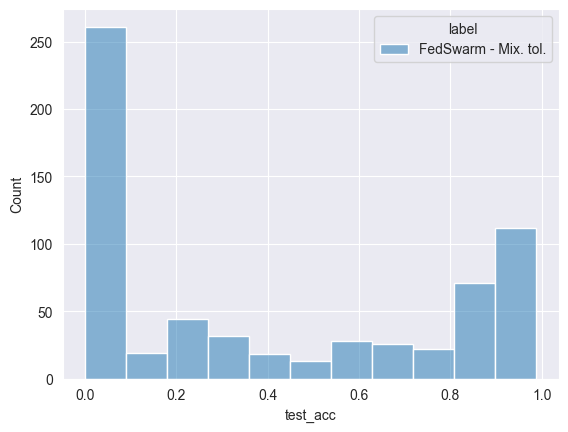

In [31]:
sns.histplot(declust_mix.loc[declust_mix.round_id == 5, ["test_acc", "label"]], x="test_acc", hue="label")

<AxesSubplot: xlabel='test_acc', ylabel='Count'>

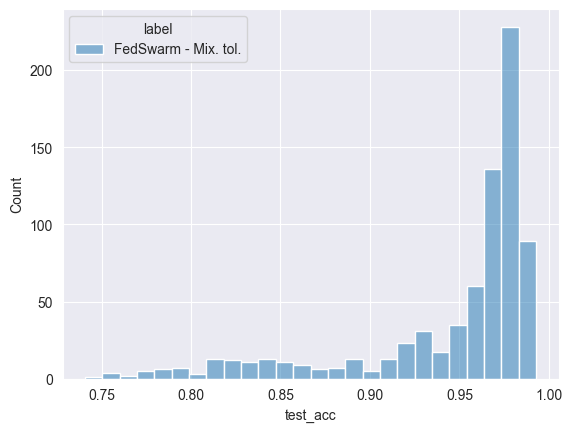

In [32]:
sns.histplot(declust_mix.loc[declust_mix.round_id == 50, ["test_acc", "label"]], x="test_acc", hue="label")

<AxesSubplot: xlabel='test_acc', ylabel='Count'>

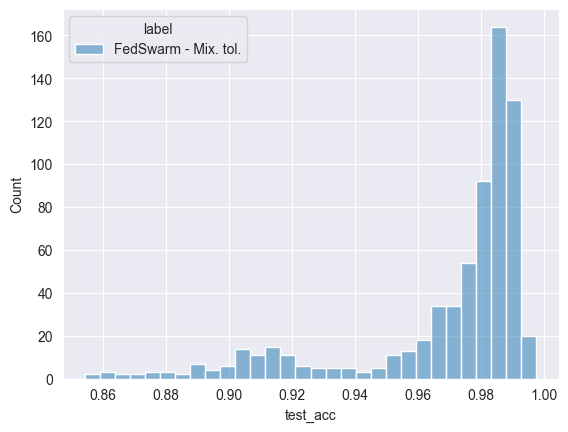

In [33]:
sns.histplot(declust_mix.loc[declust_mix.round_id == 100, ["test_acc", "label"]], x="test_acc", hue="label")